In [1]:
### in real usage set as environment variables
API_KEy=""
URL="https://demos.researchspace.com"
#API_KEY=sys.env('DEMOS_API_KEY')
URL="https://demos.researchspace.com"

In [2]:

import rspace_client
## configure client from environment variables or local credentials file
api = rspace_client.Client(URL, API_KEY)

## gleaned from the UI, or search
fileId = 30051
file_name = api.get_file_info(fileId)['name']

## retrieve from RSpace - either as file or into a stream
spectro_results = api.download_file(fileId, file_name)

AuthenticationError: User could not be authenticated for token 4FmuGC6...

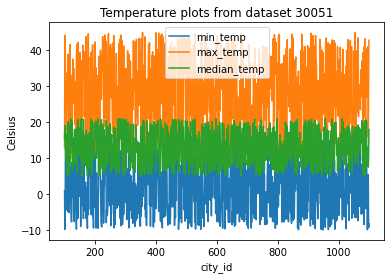

In [17]:
import pandas as pd;
df = pd.read_csv(file_name)
##....analyse the data
summary_stats = df.describe()
summary_stats.head()
df = df.set_index('city_id')
plot = df.plot(ylabel='Celsius', title=f'Temperature plots from dataset {fileId}')
img_f= f'Temperature_per_city-{fileId}'
plot.get_figure().savefig(img_f)


In [18]:
## and upload 
summary_stats_csv = f'{file_name[:file_name.rindex(".")]}-summarystats.csv'
summary_stats.to_csv(summary_stats_csv)
with open(summary_stats_csv, 'rb') as f:
    uploaded = api.upload_file(f, caption=f"Summary data for {fileId}")
    print(f"uploaded id = {uploaded['id']}")
with open(img_f+".png", 'rb') as f:
    uploaded_image = api.upload_file(f, caption=f"City vs temperature for  {fileId}")
    print(f"uploaded id = {uploaded_image['id']}")

 

uploaded id = 30168
uploaded id = 30169


In [20]:
FORM_ID=5341203

## The id of the document you want to edit
## change  this for your document ID
DOC_ID=30047
doc = api.get_document(30047)

In [21]:
content = doc['fields'][1]['content']
content = content + f"<fileId={uploaded['id']}> <fileId={uploaded_image['id']}>"
field_id= doc['fields'][1]['id']
api.update_document(document_id=DOC_ID, form_id=FORM_ID, 
                    fields=[{'id': field_id, 'content': content}])

{'id': 30047,
 'globalId': 'SD30047',
 'name': 'ReceiveFromApi',
 'created': '2021-06-09T15:26:57.485Z',
 'lastModified': '2021-06-10T09:48:35.855Z',
 'parentFolderId': 706,
 'signed': False,
 'tags': None,
 'form': {'id': 5341203,
  'globalId': 'FM5341203',
  'stableId': '1623227944925null',
  'version': 0,
  'name': 'APIUpload',
  'tags': '',
  'formState': 'PUBLISHED',
  'accessControl': {'ownerPermissionType': 'WRITE',
   'groupPermissionType': 'NONE',
   'worldPermissionType': 'READ'},
  'iconId': -1,
  '_links': [{'link': 'https://demos.researchspace.com/api/v1/forms/5341203',
    'rel': 'self'}]},
 'owner': {'id': 163840,
  'username': 'mpostdoc',
  'email': 'richard@researchspace.com',
  'firstName': 'Magalena',
  'lastName': 'Postdoc',
  'homeFolderId': 706,
  '_links': []},
 'fields': [{'id': 7963183,
   'globalId': 'FD7963183',
   'name': 'Experimental Data',
   'lastModified': '2021-06-09T15:34:48.278Z',
   'type': 'text',
   'definition': None,
   'columnIndex': 0,
   'con